In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv("classification_dataset_two.csv")

In [7]:
df.sample(n=5,random_state=42)

,age,weight_kg,height_m,bmi,body_fat_percent,grip_force,sit_ups_counts,sit_and_bend_forward_m,broad_jump_m,diastolic,systolic,gender,encoded_class,clusters
10773,0.339061,-0.294852,-0.373151,-0.964558,1.415270,0.527696,3.091042,3.191311,1.751,0.103,1.82,1,3,4
5496,-0.012444,-0.722051,1.085732,0.856633,-1.377567,-0.016189,3.761200,3.279001,1.623,0.152,2.19,1,0,3
13054,1.929204,-1.176813,2.544616,0.366313,0.763608,-0.356117,3.610918,3.381114,1.785,0.264,2.62,1,2,0
11825,1.510745,-0.763393,1.179854,0.226221,-0.260432,-0.560074,3.401197,3.285682,1.823,0.122,2.54,1,3,3
1326,1.760147,1.703341,-0.062550,-1.524925,-0.260432,-0.016189,3.988984,3.372342,1.773,0.064,1.83,1,3,4


In [8]:
X = df.drop('encoded_class',axis=1)
y = df['encoded_class']

In [13]:
# from sklearn.compose import  ColumnTransformer
from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import  StandardScaler
# from sklearn.decomposition import PCA
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.model_selection import  GridSearchCV,StratifiedShuffleSplit,train_test_split

In [18]:
X_train,X_test, y_train,y_test = train_test_split(X,y,random_state=42,stratify=y,test_size=.20)

In [19]:
my_pipe = Pipeline(
    [
        ('clf',KNeighborsClassifier(n_jobs=-2))
    ]
)

In [22]:
my_params = [
    {
        # KNeighborsClassifier
        "clf":[KNeighborsClassifier(n_jobs=-2)],
        'clf__n_neighbors':[3,4,5,6],
        "clf__weights":['uniform','distance'],
        "clf__p":[1,2]
    },

    {
        # RandomForestClassifier
        'clf':[RandomForestClassifier(random_state=42,warm_start=True,n_jobs=-2)],
        "clf__n_estimators":[50,100,150,200],
        "clf__max_depth":[3,5,7],
        'clf__min_samples_split':[2,3,5]
    },

    {   # LogisticRegression
        "clf":[LogisticRegression(random_state=42,n_jobs=-2)],
        'clf__solver':['newton-cg','sag','saga','lbfgs'],
        'clf__penalty':['l2','l1','elasticnet','none'],
        "clf__C":[0.5, 0.7,1]
    },

    {   # SGDClassifier
        "clf":[SGDClassifier(random_state=42,warm_start=True,n_jobs=-2)],
        'clf__early_stopping':[True,False],
        'clf__loss':['hinge','log_loss'],
        "clf__alpha":[0.0001, 0.0005,0.001,0.005,0.01]
    },
    
    {
        # DecisionTreeClassifier
        "clf":[DecisionTreeClassifier(random_state=42)],
        'clf__min_samples_split':[2,3,5],
        "clf__max_depth":[3,5,7],
    },
    
    {   # AdaBoostClassifier
        'clf':[AdaBoostClassifier(random_state=42)],
        "clf__n_estimators":[50,100,150,200],
    },
]

my_cv = StratifiedShuffleSplit(n_splits=5,test_size=.20,random_state=42)

In [23]:
mygrid = GridSearchCV(my_pipe,param_grid=my_params,cv=my_cv)
mygrid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
             estimator=Pipeline(steps=[('clf',
                                        KNeighborsClassifier(n_jobs=-2))]),
             param_grid=[{'clf': [KNeighborsClassifier(n_jobs=-2)],
                          'clf__n_neighbors': [3, 4, 5, 6], 'clf__p': [1, 2],
                          'clf__weights': ['uniform', 'distance']},
                         {'clf': [RandomForestClassifier(max_depth=7,
                                                         min_sa...
                         {'clf': [SGDClassifier(n_jobs=-2, random_state=42,
                                                warm_start=True)],
                          'clf__alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01],
                          'clf__early_stopping': [True, False],
                          'clf__loss': ['hinge', 'log_loss']},
                         {'clf': [DecisionTreeClassifier(random_s

In [24]:
print(f"Best params: {mygrid.best_params_}\n")
print(f"Best estimator: {mygrid.best_estimator_}\n")
print(f"Best validation score: {mygrid.best_score_}")

Best params: {'clf': RandomForestClassifier(max_depth=7, min_samples_split=5, n_jobs=-2,
                       random_state=42, warm_start=True), 'clf__max_depth': 7, 'clf__min_samples_split': 5, 'clf__n_estimators': 100}

Best estimator: Pipeline(steps=[('clf',
                 RandomForestClassifier(max_depth=7, min_samples_split=5,
                                        n_jobs=-2, random_state=42,
                                        warm_start=True))])

Best validation score: 0.7338310779281382


In [28]:
# grid_results = pd.DataFrame(mygrid.cv_results_)
# display(grid_results.sort_values(by='rank_test_score'))

In [29]:
mygrid_trainset = mygrid.best_estimator_ # 100 estimators

In [43]:
rf = RandomForestClassifier(
    max_depth=7,
    min_samples_split=5,
    n_jobs=-2,
    random_state=42,
    n_estimators=100
)

rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, min_samples_split=5, n_jobs=-2,
                       random_state=42)

In [44]:
X.shape[1]

13

In [45]:
# Looking at feature importance
def feature_importances(X,model):
    importance = model.feature_importances_
    importance_sort = np.argsort(importance)[::-1]
    print("Feature importances: \n{}".format(importance))
    print("Feature importance sorted indices: \n{}".format(importance_sort))
    print("Feature importance sorted: \n{}".format(importance[importance_sort]))
    feature_dict = {}
    for index in importance_sort:
        feature_dict[list(X)[index]] = float(importance[index])
    print("The features with their names:")
    return feature_dict

feature_importances(X,rf)

Feature importances: 
[0.03106379 0.06750845 0.02762873 0.11383075 0.01099377 0.01420912
 0.02985529 0.06604085 0.01307254 0.30590679 0.03473192 0.01539028
 0.26976773]
Feature importance sorted indices: 
[ 9 12  3  1  7 10  0  6  2 11  5  8  4]
Feature importance sorted: 
[0.30590679 0.26976773 0.11383075 0.06750845 0.06604085 0.03473192
 0.03106379 0.02985529 0.02762873 0.01539028 0.01420912 0.01307254
 0.01099377]
The features with their names:


{'diastolic': 0.305906790111216,
 'clusters': 0.2697677286499295,
 'bmi': 0.11383075171135625,
 'weight_kg': 0.06750845335859908,
 'sit_and_bend_forward_m': 0.06604084602787964,
 'systolic': 0.03473192231734728,
 'age': 0.031063785997492467,
 'sit_ups_counts': 0.029855289287984425,
 'height_m': 0.02762873287557025,
 'gender': 0.015390278876948072,
 'grip_force': 0.014209116715337068,
 'broad_jump_m': 0.013072535253223638,
 'body_fat_percent': 0.010993768817116405}

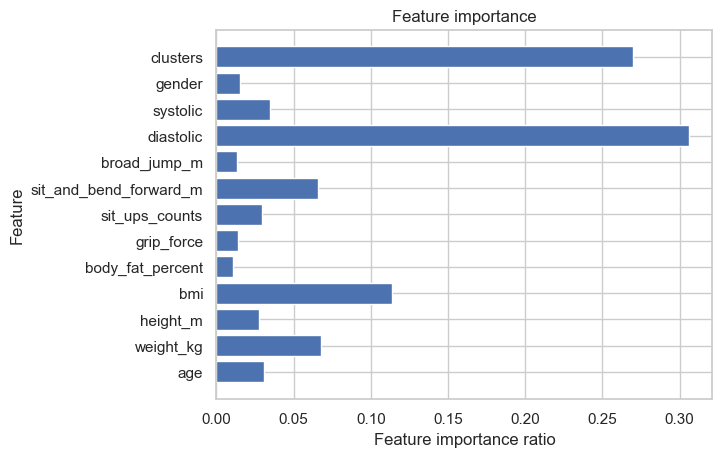

In [51]:
def plot_feature_importances(model):
    sns.set_theme(style='whitegrid')
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance ratio")
    plt.ylabel("Feature")
    plt.title("Feature importance")
plot_feature_importances(rf)

In [52]:
mygrid_trainset

Pipeline(steps=[('clf',
                 RandomForestClassifier(max_depth=7, min_samples_split=5,
                                        n_jobs=-2, random_state=42,
                                        warm_start=True))])

### **Training data**

              precision    recall  f1-score   support

           0       0.73      0.90      0.80      2677
           1       0.76      0.50      0.60      2678
           2       0.68      0.83      0.75      2679
           3       0.91      0.80      0.85      2679

    accuracy                           0.76     10713
   macro avg       0.77      0.76      0.75     10713
weighted avg       0.77      0.76      0.75     10713



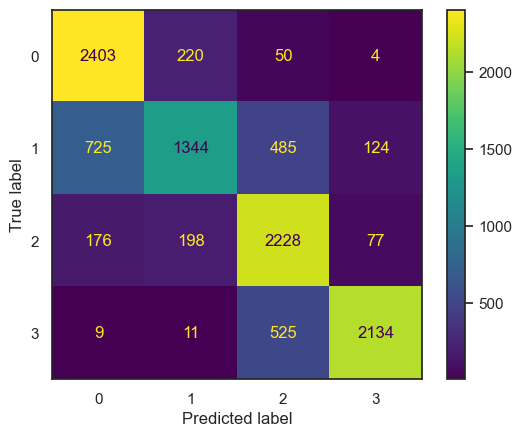

In [53]:
# Classification report
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
y_pred_train = mygrid_trainset.predict(X_train)

y_train = y_train
sns.set_theme(style='white')
def class_report(model,y_train,y_pred_train):
    print(classification_report(y_train,y_pred_train))
    cm = confusion_matrix(y_train,y_pred_train,labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()


class_report(mygrid_trainset,y_train,y_pred_train)

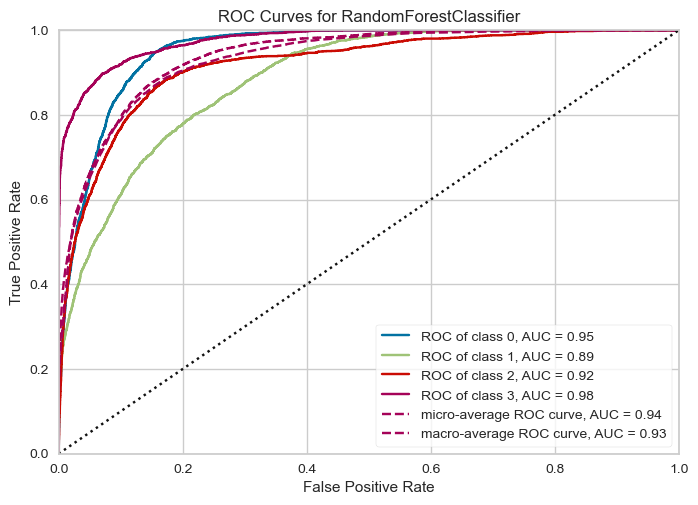

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [54]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(mygrid_trainset, classes=[0,1,2,3])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_train, y_train)        # Evaluate the model on the training data
visualizer.show()

### **Test data**

In [55]:
mygrid_testset = mygrid.best_estimator_
y_pred_test = mygrid_testset.predict(X_test)
y_pred_test

array([3, 2, 3, ..., 0, 0, 3], dtype=int64)

              precision    recall  f1-score   support

           0       0.69      0.89      0.78       670
           1       0.73      0.43      0.54       669
           2       0.66      0.79      0.72       670
           3       0.87      0.81      0.84       670

    accuracy                           0.73      2679
   macro avg       0.74      0.73      0.72      2679
weighted avg       0.74      0.73      0.72      2679



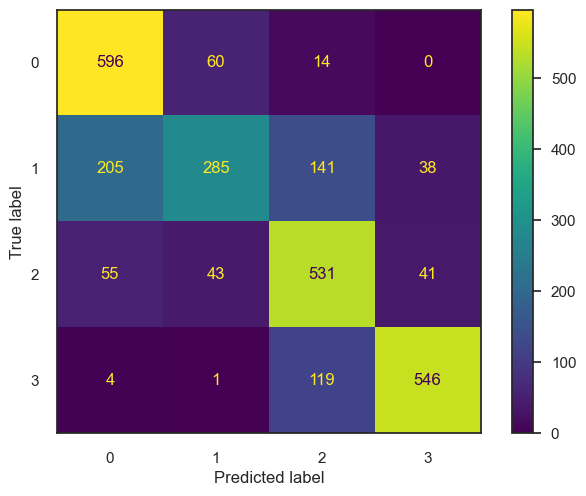

In [56]:
# Classification report
y_test = y_test
sns.set_theme(style='white')
def class_report(model,y_test,pred):
    print(classification_report(y_test,pred))
    cm = confusion_matrix(y_test,pred,labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()


class_report(mygrid_testset,y_test,y_pred_test)

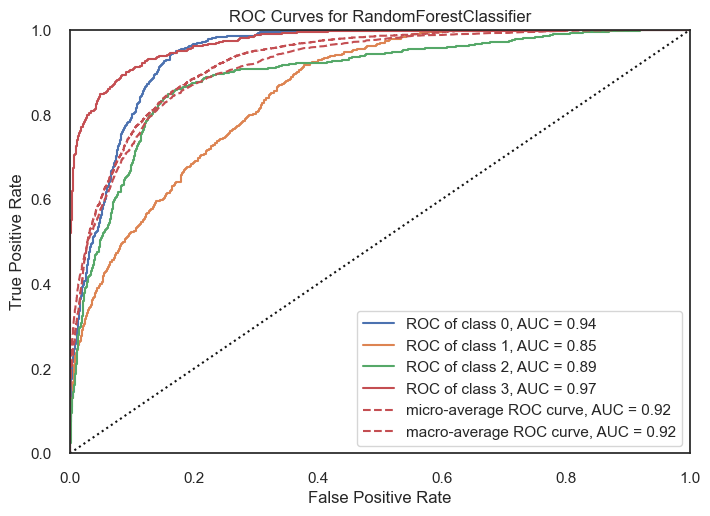

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [57]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(mygrid_testset, classes=[0,1,2,3])

visualizer.fit(X_test, y_test)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the training data
visualizer.show()